In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.utils.vis_utils import plot_model

In [ ]:
#runing code ini buat ngehubungin sama drive masing-masing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lokasi = 'drive/MyDrive/Dicoding/Daun'
import os
os.listdir(lokasi)

['Sakit', 'Sehat']

In [ ]:
#Initializing the CNN

np.random.seed(90)
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (150, 150, 3), activation = 'relu'))
classifier.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
classifier.add(Convolution2D(8, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
classifier.add(Flatten())

In [ ]:
#hidden layer
classifier.add(Dense(150, activation = 'relu'))
classifier.add(Dropout(0.5))

#output layer
classifier.add(Dense(2, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 8)           1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                

# **SKEMA 1**
Data Latih = 100%

Data Uji = 0%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 100 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 1s - loss: 0.6932 - accuracy: 0.5000
Epoch 2/25
2/2 - 1s - loss: 0.6968 - accuracy: 0.3750
Epoch 3/25
2/2 - 1s - loss: 0.6937 - accuracy: 0.5000
Epoch 4/25
2/2 - 1s - loss: 0.6931 - accuracy: 0.5000
Epoch 5/25
2/2 - 1s - loss: 0.6901 - accuracy: 0.6250
Epoch 6/25
2/2 - 1s - loss: 0.6983 - accuracy: 0.3750
Epoch 7/25
2/2 - 1s - loss: 0.6949 - accuracy: 0.3750
Epoch 8/25
2/2 - 1s - loss: 0.6856 - accuracy: 0.7500
Epoch 9/25
2/2 - 1s - loss: 0.6931 - accuracy: 0.5000
Epoch 10/25
2/2 - 1s - loss: 0.7015 - accuracy: 0.2500
Epoch 11/25
2/2 - 1s - loss: 0.6971 - accuracy: 0.3750
Epoch 12/25
2/2 - 1s - loss: 0.6890 - accuracy: 0.6250
Epoch 13/25
2/2 - 1s - loss: 0.6924 - accuracy: 0.5000
Epoch 14/25
2/2 - 1s - loss: 0.6960 - accuracy: 0.2500
Epoch 15/25
2/2 - 1s - loss: 0.6889 - accuracy: 0.7500
Epoch 16/25
2/2 - 1s - loss: 0.6943 - accuracy: 0.5000
Epoch 17/25
2/2 - 1s - loss: 0.6905 - accuracy: 0.6250
Epoch 18/25
2/2 - 1s - loss: 0.6931 - accuracy: 0.5000
Epoch 19/25
2/2 - 1

# Dari hasil skema 1, didapatkan akurasi sebesar 75%

Saving IMG_20190419_103510.jpg to IMG_20190419_103510.jpg
IMG_20190419_103510.jpg
1
Sehat


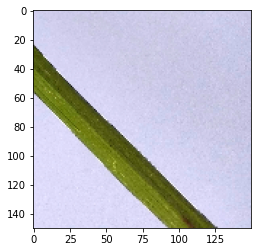

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **SKEMA 2** 
Data Latih = 95%

Data Uji = 5%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.05)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 96 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 3s - loss: 0.6937 - accuracy: 0.3750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/25
2/2 - 1s - loss: 0.6941 - accuracy: 0.5000
Epoch 3/25
2/2 - 1s - loss: 0.6937 - accuracy: 0.3750
Epoch 4/25
2/2 - 1s - loss: 0.6907 - accuracy: 0.8750
Epoch 5/25
2/2 - 1s - loss: 0.6922 - accuracy: 0.3750
Epoch 6/25
2/2 - 1s - loss: 0.6924 - accuracy: 0.5000
Epoch 7/25
2/2 - 1s - loss: 0.6922 - accuracy: 0.6250
Epoch 8/25
2/2 - 1s - loss: 0.6922 - accuracy: 0.5000
Epoch 9/25
2/2 - 1s - loss: 0.6931 - accuracy: 0.6250
Epoch 10/25
2/2 - 1s - loss: 0.6938 - accuracy: 0.5000
Epoch 11/25
2/2 - 1s - loss: 0.6914 - accuracy: 0.7500
Epoch 12/25
2/2 - 1s - loss: 0.6897 - accuracy: 0.7500
Epoch 13/25
2/2 - 1s - loss: 0.6956 - accuracy: 0.1250
Epoch 14/25
2/2 - 1s - loss: 0.6945 - accuracy: 0.3750
Epoch 15/25
2/2 - 1s - loss: 0.6952 - accuracy: 0.3750
Epoch 16/25
2/2 - 1s - loss: 0.6959 - accuracy: 0.1250
Epoch 17/25
2/2 - 1s - loss: 0.6907 - accuracy: 0.5000
Epoch 18/25
2/2 - 1s - loss: 0.6

# Dari Hasil Skema 2, Didapatkan akurasi sebesar 87%

Saving IMG_3065.jpg to IMG_3065.jpg
IMG_3065.jpg
1
Sehat


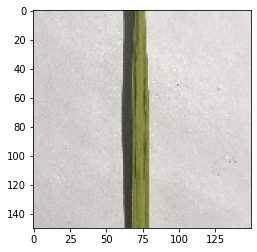

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **SKEMA 3**
Data Latih = 90%

DAta Uji = 10%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 3s - loss: 0.6902 - accuracy: 0.6250 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/25
2/2 - 1s - loss: 0.6817 - accuracy: 0.7500
Epoch 3/25
2/2 - 1s - loss: 0.6979 - accuracy: 0.3750
Epoch 4/25
2/2 - 1s - loss: 0.6862 - accuracy: 0.6250
Epoch 5/25
2/2 - 1s - loss: 0.7036 - accuracy: 0.3750
Epoch 6/25
2/2 - 1s - loss: 0.6917 - accuracy: 0.5000
Epoch 7/25
2/2 - 1s - loss: 0.7054 - accuracy: 0.2500
Epoch 8/25
2/2 - 1s - loss: 0.6985 - accuracy: 0.3750
Epoch 9/25
2/2 - 1s - loss: 0.6946 - accuracy: 0.5000
Epoch 10/25
2/2 - 1s - loss: 0.6897 - accuracy: 0.6250
Epoch 11/25
2/2 - 1s - loss: 0.6893 - accuracy: 0.6250
Epoch 12/25
2/2 - 1s - loss: 0.6899 - accuracy: 0.6250
Epoch 13/25
2/2 - 1s - loss: 0.6976 - accuracy: 0.3750
Epoch 14/25
2/2 - 1s - loss: 0.6897 - accuracy: 0.6250
Epoch 15/25
2/2 - 1s - loss: 0.6945 - accuracy: 0.5000
Epoch 16/25
2/2 - 1s - loss: 0.6808 - accuracy: 0.7500
Epoch 17/25
2/2 - 1s - loss: 0.6876 - accuracy: 0.6250
Epoch 18/25
2/2 - 1s - loss: 0.7

# Dari Hasil Skema 3, Didapatkan akurasi sebesar 75%

Saving IMG_20190419_095429 (1).jpg to IMG_20190419_095429 (1) (2).jpg
IMG_20190419_095429 (1).jpg
1
Sehat


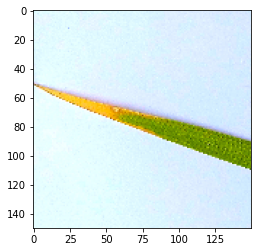

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **SKEMA 4**
Data Latih = 85%

Data Uji = 15%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.15)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 86 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 4s - loss: 0.6881 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/25
2/2 - 1s - loss: 0.6884 - accuracy: 0.6250
Epoch 3/25
2/2 - 1s - loss: 0.7022 - accuracy: 0.3750
Epoch 4/25
2/2 - 1s - loss: 0.6975 - accuracy: 0.3750
Epoch 5/25
2/2 - 1s - loss: 0.6955 - accuracy: 0.5000
Epoch 6/25
2/2 - 1s - loss: 0.6764 - accuracy: 0.7500
Epoch 7/25
2/2 - 1s - loss: 0.6954 - accuracy: 0.3750
Epoch 8/25
2/2 - 1s - loss: 0.6844 - accuracy: 0.7500
Epoch 9/25
2/2 - 1s - loss: 0.6835 - accuracy: 0.6250
Epoch 10/25
2/2 - 1s - loss: 0.6942 - accuracy: 0.5000
Epoch 11/25
2/2 - 1s - loss: 0.6856 - accuracy: 0.6250
Epoch 12/25
2/2 - 1s - loss: 0.6935 - accuracy: 0.5000
Epoch 13/25
2/2 - 1s - loss: 0.6876 - accuracy: 0.5000
Epoch 14/25
2/2 - 1s - loss: 0.6850 - accuracy: 0.6250
Epoch 15/25
2/2 - 1s - loss: 0.6866 - accuracy: 0.6250
Epoch 16/25
2/2 - 1s - loss: 0.6834 - accuracy: 0.6250
Epoch 17/25
2/2 - 1s - loss: 0.6917 - accuracy: 0.5000
Epoch 18/25
2/2 - 1s - loss: 0.7

# Dari Hasil Skema 4, Didapatkan akurasi sebesar 75%

Saving IMG_20190424_134008.jpg to IMG_20190424_134008.jpg
IMG_20190424_134008.jpg
1
Sehat


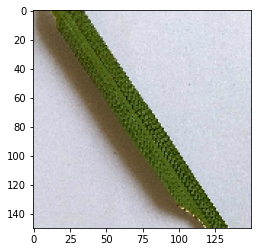

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=4)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **SKEMA 5**

Data Latih = 80%

Data Uji = 20%


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 4s - loss: 0.6957 - accuracy: 0.3750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/25
2/2 - 3s - loss: 0.6959 - accuracy: 0.2500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/25
2/2 - 3s - loss: 0.6914 - accuracy: 0.6250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/25
2/2 - 3s - loss: 0.6906 - accuracy: 0.7500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/25
2/2 - 3s - loss: 0.6970 - accuracy: 0.2500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/25
2/2 - 3s - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/25
2/2 - 4s - loss: 0.6925 - accuracy: 0.6250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/25
2/2 - 3s - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/25
2/2 - 3s - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/25
2/2 - 3s - loss: 0.6936 - accuracy: 0.3750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 11/25
2/2 - 3s - loss: 0.6923 - a

# Dari Hasil Skema 5, Didapatkan akurasi sebesar 87%

Saving IMG_20190419_095429 (1).jpg to IMG_20190419_095429 (1) (5).jpg
IMG_20190419_095429 (1).jpg
0
Sakit


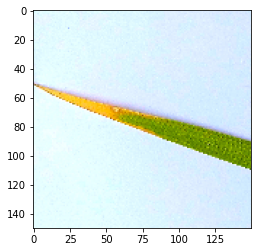

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=8)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)

# **SKEMA 6**

Data Latih = 75%

Data Uji = 25%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.25)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 76 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 5s - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 2/25
2/2 - 4s - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.4500
Epoch 3/25
2/2 - 4s - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 4/25
2/2 - 4s - loss: 0.6854 - accuracy: 0.7500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/25
2/2 - 4s - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/25
2/2 - 4s - loss: 0.6870 - accuracy: 0.7500 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/25
2/2 - 4s - loss: 0.6840 - accuracy: 0.7500 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/25
2/2 - 4s - loss: 0.6857 - accuracy: 0.7500 - val_loss: 0.6953 - val_accuracy: 0.4500
Epoch 9/25
2/2 - 4s - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6976 - val_accuracy: 0.4000
Epoch 10/25
2/2 - 4s - loss: 0.7053 - accuracy: 0.2500 - val_loss: 0.6978 - val_accuracy: 0.4000
Epoch 11/25
2/2 - 4s - loss: 0.6952 - a

# Dari Hasil Skema 6, Didapatkan akurasi sebesar 87%

# **SKEMA 7**
Data Latih = 70%

Data Uji = 30%


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 5s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.5500
Epoch 2/25
2/2 - 4s - loss: 0.6903 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/25
2/2 - 3s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.4500
Epoch 4/25
2/2 - 4s - loss: 0.6860 - accuracy: 0.6250 - val_loss: 0.6909 - val_accuracy: 0.5500
Epoch 5/25
2/2 - 4s - loss: 0.6886 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/25
2/2 - 3s - loss: 0.6764 - accuracy: 0.8750 - val_loss: 0.6908 - val_accuracy: 0.5500
Epoch 7/25
2/2 - 4s - loss: 0.6955 - accuracy: 0.3750 - val_loss: 0.6907 - val_accuracy: 0.5500
Epoch 8/25
2/2 - 4s - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 9/25
2/2 - 4s - loss: 0.6877 - accuracy: 0.6250 - val_loss: 0.6995 - val_accuracy: 0.4000
Epoch 10/25
2/2 - 3s - loss: 0.6660 - accuracy: 1.0000 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 11/25
2/2 - 4s - loss: 0.6875 - a

# Dari Hasil Skema 7, Didapatkan akurasi sebesar 100%

# **SKEMA 8**
Data Latih = 65%

Data Uji = 35%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.35)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 66 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 5s - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 2/25
2/2 - 4s - loss: 0.7145 - accuracy: 0.1250 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/25
2/2 - 4s - loss: 0.6810 - accuracy: 0.6250 - val_loss: 0.6993 - val_accuracy: 0.4000
Epoch 4/25
2/2 - 4s - loss: 0.6880 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/25
2/2 - 4s - loss: 0.6866 - accuracy: 0.6250 - val_loss: 0.7019 - val_accuracy: 0.3500
Epoch 6/25
2/2 - 4s - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 7/25
2/2 - 4s - loss: 0.6906 - accuracy: 0.6250 - val_loss: 0.6991 - val_accuracy: 0.4000
Epoch 8/25
2/2 - 4s - loss: 0.7022 - accuracy: 0.3750 - val_loss: 0.6963 - val_accuracy: 0.4500
Epoch 9/25
2/2 - 3s - loss: 0.6788 - accuracy: 0.8333 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 10/25
2/2 - 4s - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 11/25
2/2 - 3s - loss: 0.6753 - a

# Dari Hasil Skema 8, Didapatkan akurasi sebesar 83%

# **SKEMA 9**
Data Latih = 60%

Data Uji = 40%

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        lokasi,  # direktori data latih
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        lokasi, # direktori data validasi
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 60 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
classifier.fit_generator(
        train_generator,
        steps_per_epoch=2,
        epochs=25,
        validation_data=val_generator,
        validation_steps=5,
        verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 5s - loss: 0.6935 - accuracy: 0.3750 - val_loss: 0.6926 - val_accuracy: 0.5500
Epoch 2/25
2/2 - 4s - loss: 0.6910 - accuracy: 0.6250 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 3/25
2/2 - 4s - loss: 0.6927 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 4/25
2/2 - 4s - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 5/25
2/2 - 4s - loss: 0.6958 - accuracy: 0.3750 - val_loss: 0.6939 - val_accuracy: 0.3500
Epoch 6/25
2/2 - 4s - loss: 0.6931 - accuracy: 0.3750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/25
2/2 - 4s - loss: 0.6949 - accuracy: 0.6250 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 8/25
2/2 - 4s - loss: 0.6898 - accuracy: 0.8750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 9/25
2/2 - 4s - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/25
2/2 - 4s - loss: 0.6937 - accuracy: 0.3750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 11/25
2/2 - 4s - loss: 0.6965 - a

# Dari Hasil Skema 9, Didapatkan akurasi sebesar 87%

Saving IMG_20190419_100814.jpg to IMG_20190419_100814 (2).jpg
IMG_20190419_100814.jpg
0
Sakit


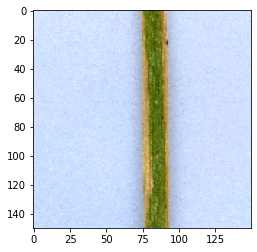

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
     
masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():
     
  path = i
  gambar = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(gambar)
  a = image.img_to_array(gambar)
  b = np.expand_dims(a, axis=0)
    
  images = np.vstack([b])
  kelas = classifier.predict(images, batch_size=8)
  akhir = np.argmax(kelas)
      
  print(i)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)